   age gender     split     final  split_sec  final_sec
0   33      M  01:05:38  02:08:51     3938.0     7731.0
1   32      M  01:06:26  02:09:28     3986.0     7768.0
2   31      M  01:06:49  02:10:42     4009.0     7842.0
3   38      M  01:06:16  02:13:45     3976.0     8025.0
4   31      M  01:06:32  02:13:59     3992.0     8039.0


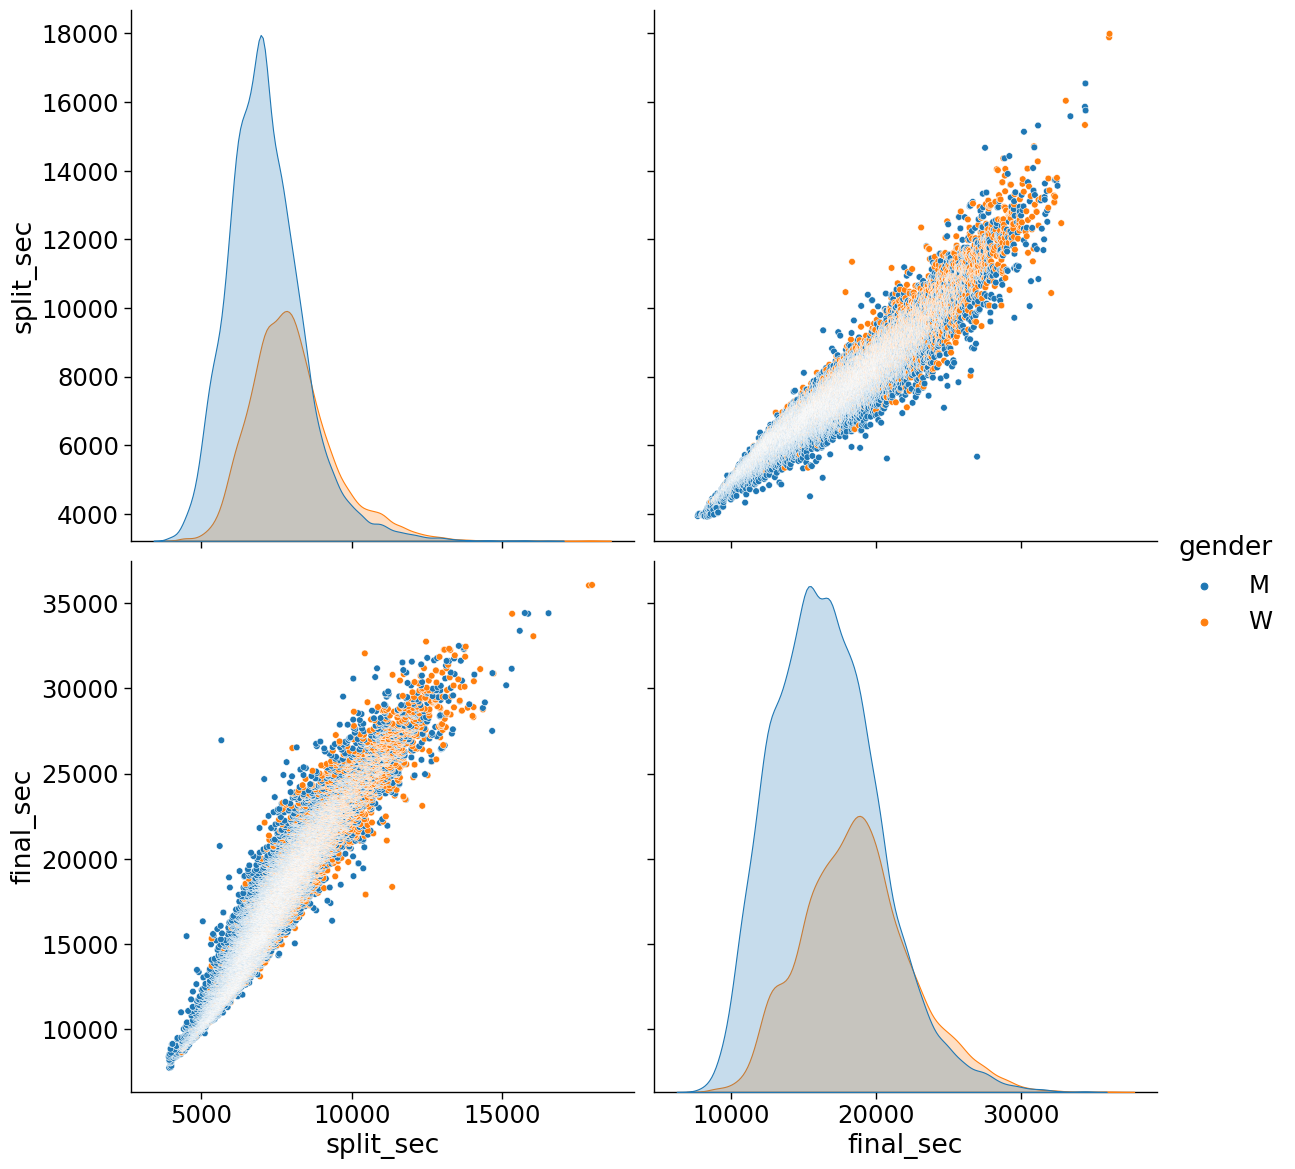

In [20]:
#https://video.ittensive.com/python-advanced/marathon-data.csv
'''def timestamp_to_seconds(t):
    return sum(float(n) * m for n,
               m in zip(reversed(time.split(':')), (1, 60, 3600))
               )'''
%matplotlib inline
import pandas as pd
import seaborn as sbrn
import matplotlib.pyplot as mtplt
import scipy.stats as stats

def time_in_seconds(time):
    return sum(float(n) * m for n, m in zip(reversed(time.split(':')),(1, 60, 3600)))
               
sbrn.set_context("paper", font_scale=2)
data = pd.read_csv("http://video.ittensive.com/python-advanced/marathon-data.csv", delimiter=",")
data["split_sec"] = data["split"].apply(lambda x: time_in_seconds(x))
data["final_sec"] = data["final"].apply(lambda x: time_in_seconds(x))
data_r = pd.DataFrame(data, columns=["split_sec", "final_sec", "gender"])
print (data.head())
sbrn.pairplot(data_r, hue="gender", height=6)
plt.show()
sbrn.jointplot( data_r, x="split_sec",y = "final_sec", height=12, kind="kde")
plt.show()


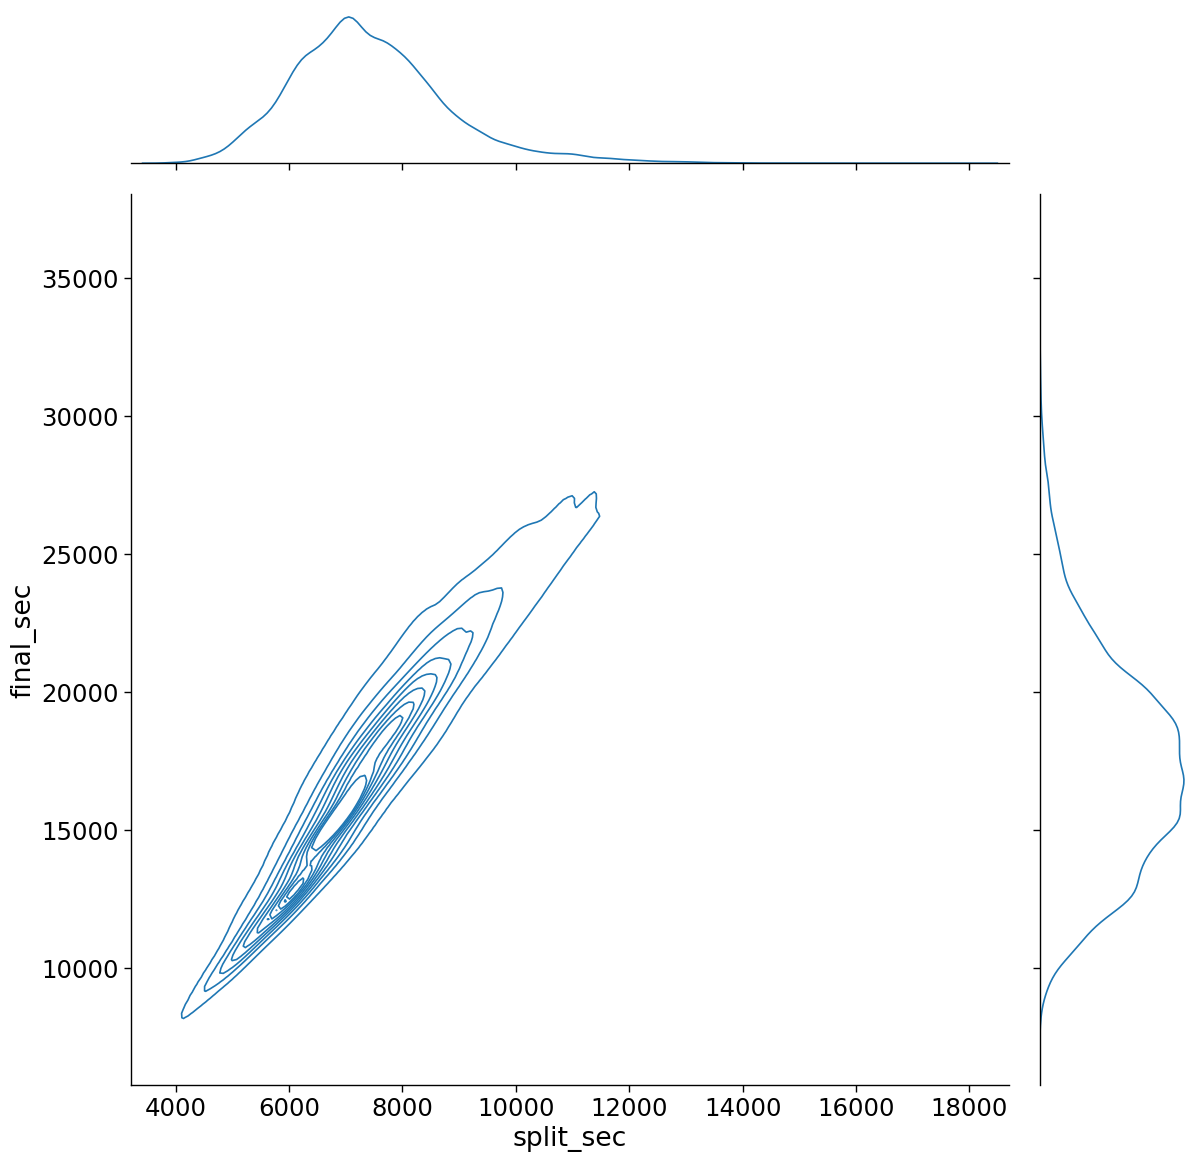

In [25]:
sbrn.jointplot( data_r, x="split_sec",y = "final_sec", height=12, kind="kde")
plt.show()

In [24]:
print (round(stats.pearsonr(data_r["split_sec"], data_r["final_sec"])[0], 2))

0.96
